# Advanced Operationsand Features
> "Image Processing in Python".



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

plt.rcParams['figure.figsize'] = (10, 8)

### Edges
Identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.



In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

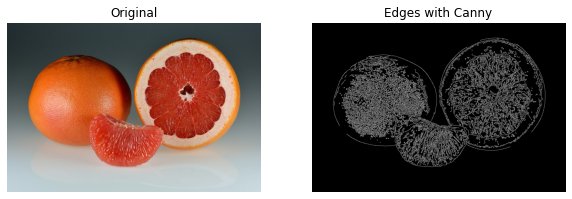

In [5]:
from skimage.feature import canny
from skimage import color

grapefruit = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Grapefruits_-_whole-halved-segments.jpg/1200px-Grapefruits_-_whole-halved-segments.jpg') # Import the image

# Convert image to grayscale
grapefruitb = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruitb)

# Show resulting image
plot_comparison(grapefruit, canny_edges, "Edges with Canny")

### Less edgy
Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.


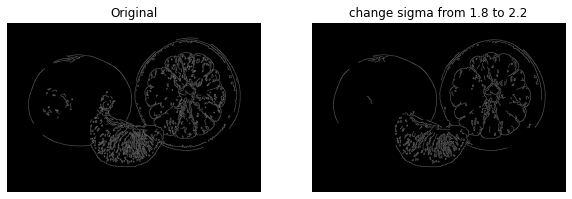

In [6]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruitb, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruitb, sigma=2.2)

# Show resulting image
plot_comparison(edges_1_8, edges_2_2, 'change sigma from 1.8 to 2.2')

## Right around the corner


## Perspective
Here i worked on detecting the corners of a building using the Harris corner detector.



In [7]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')

## Working on the image with Building Corner Top

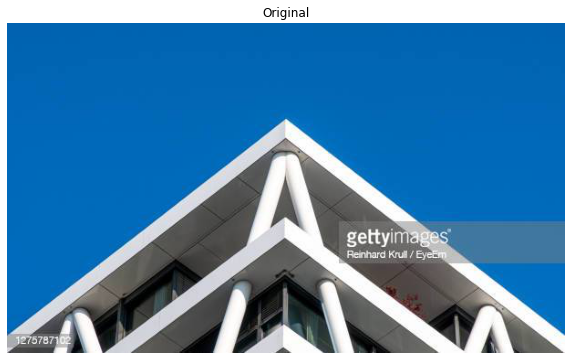

In [8]:
from skimage.feature import corner_harris, corner_peaks

building_image = imread('https://media.gettyimages.com/photos/low-angle-view-of-building-against-clear-blue-sky-picture-id1275787102?s=612x612') #image of corner of a building 

# Convert image from RGB to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')

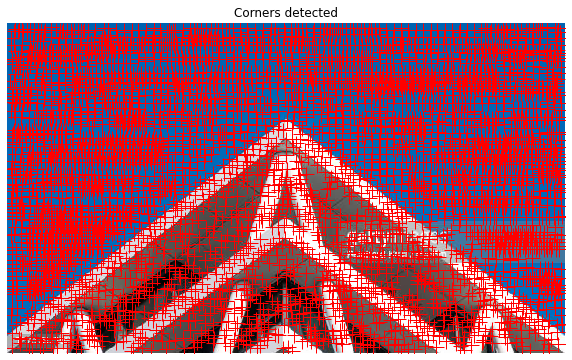

In [9]:
show_image_with_corners(building_image, coords)

### Less corners
Testing what happens when you set the minimum distance between corner peaks to be a higher number. Using `min_distance` attribute parameter of the `corner_peaks()` function.

In [10]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print('With a min_distance set to 40, we detect a total', len(coords_w_min_40), 'corners in the image.')

With a min_distance set to 2, we detect a total 4829 corners in the image.
With a min_distance set to 40, we detect a total 8 corners in the image.


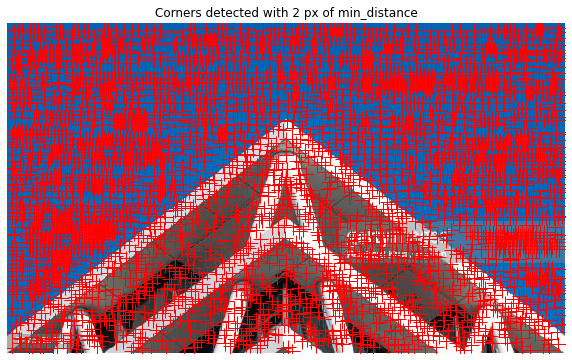

In [11]:
# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")

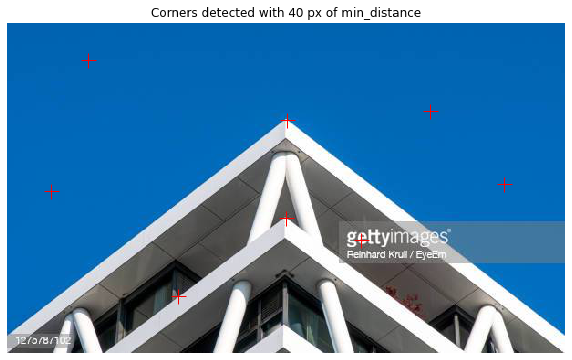

In [13]:
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")